In [1]:
import numpy as np
import matplotlib.pyplot as plt
import emcee
import corner
import matplotlib.patches as mpatches

In [2]:
%matplotlib inline
%matplotlib notebook

In [3]:
plt.rcParams.update({'font.size': 14})

plt.rcParams.update({'axes.linewidth': 1.25})
plt.rcParams.update({'axes.labelpad': 5})

plt.rcParams.update({'xtick.major.size': 7.5})
plt.rcParams.update({'xtick.minor.size': 4.0})
plt.rcParams.update({'ytick.major.size': 7.5})
plt.rcParams.update({'ytick.minor.size': 4.0})

plt.rcParams.update({'xtick.major.width': 1.5})
plt.rcParams.update({'ytick.major.width': 1.5})
plt.rcParams.update({'xtick.minor.width': 1.0})
plt.rcParams.update({'ytick.minor.width': 1.0})

plt.rcParams.update({'xtick.major.pad': 5})
plt.rcParams.update({'ytick.major.pad': 5})

plt.rcParams.update({'xtick.top': True})
plt.rcParams.update({'ytick.right': True})
plt.rcParams.update({'xtick.labeltop': False})
plt.rcParams.update({'ytick.labelright': False})

plt.rcParams.update({'xtick.direction': "in"})
plt.rcParams.update({'ytick.direction': "in"})

In [4]:
rad  = [26.500565400000003,59.974963800000005,151.099715]
path = ['./Ricci/','./Zubko/','./DSHARP/']
name = ['R1','R2','R3']

In [5]:
def emcee_reader(path_idx,rad_idx):
    
    filenm  = 'CITau_SEDfit_{}.hdf5'.format(rad_idx)

    reader  = emcee.backends.HDFBackend(path_idx+filenm, read_only=True)

    tau     = reader.get_autocorr_time(tol=0)

    burnin  = int(5 * np.max(tau))
    thin    = int(0.5 * np.min(tau))       

    samples = reader.get_chain()

    flat_samples = reader.get_chain(discard=burnin, thin=thin, flat=True)

    blobs   = reader.get_blobs(discard=burnin, thin=thin, flat=True)

    flat_log_prior_samples = blobs["log_prior"]
    flat_temp              = blobs["temp"]
    
    return flat_samples, flat_log_prior_samples, flat_temp

In [6]:
import matplotlib.colors as colors
import matplotlib.cm as cm

interval  = np.linspace(0,1,9)
cmap      = plt.get_cmap('YlGnBu')
norm      = colors.Normalize(vmin=interval[0], vmax=interval[-1])
scalarMap = cm.ScalarMappable(norm=norm, cmap=cmap)

color1    = '#345995'#scalarMap.to_rgba(interval[7])
color2    = '#57cc99'#scalarMap.to_rgba(interval[5])
color3    = '#f7b801'#scalarMap.to_rgba(interval[3])

color     = [color1,color2,color3]

In [7]:
plot_ranges = [
    [[8.,52.],[-2.6, 0.2],[-2.2, 0.2],[0.6,4.2]],
    [[8.,32.],[-2.6,-0.4],[-2.2,-0.2],[0.6,4.2]],
    [[5.,19.],[-2.8,-0.7],[-2.2, 0.2],[0.6,4.2]],
]

legend_elements = [
    mpatches.Patch(color=color1, label='  Ricci (compact)' , alpha=0.7),
    mpatches.Patch(color=color2, label='  Zubko (BE)' , alpha=0.7),
    mpatches.Patch(color=color3, label='  DSHARP (default)', alpha=0.7),
    #Line2D([0], [0], ls='-', lw=2.0, color=color2, label='Ricci' ),
    #Line2D([0], [0], ls='-', lw=2.0, color=color3, label='Zubko' ),
    #Line2D([0], [0], ls='-', lw=2.0, color=color1, label='DSHARP'),
]

<IPython.core.display.Javascript object>


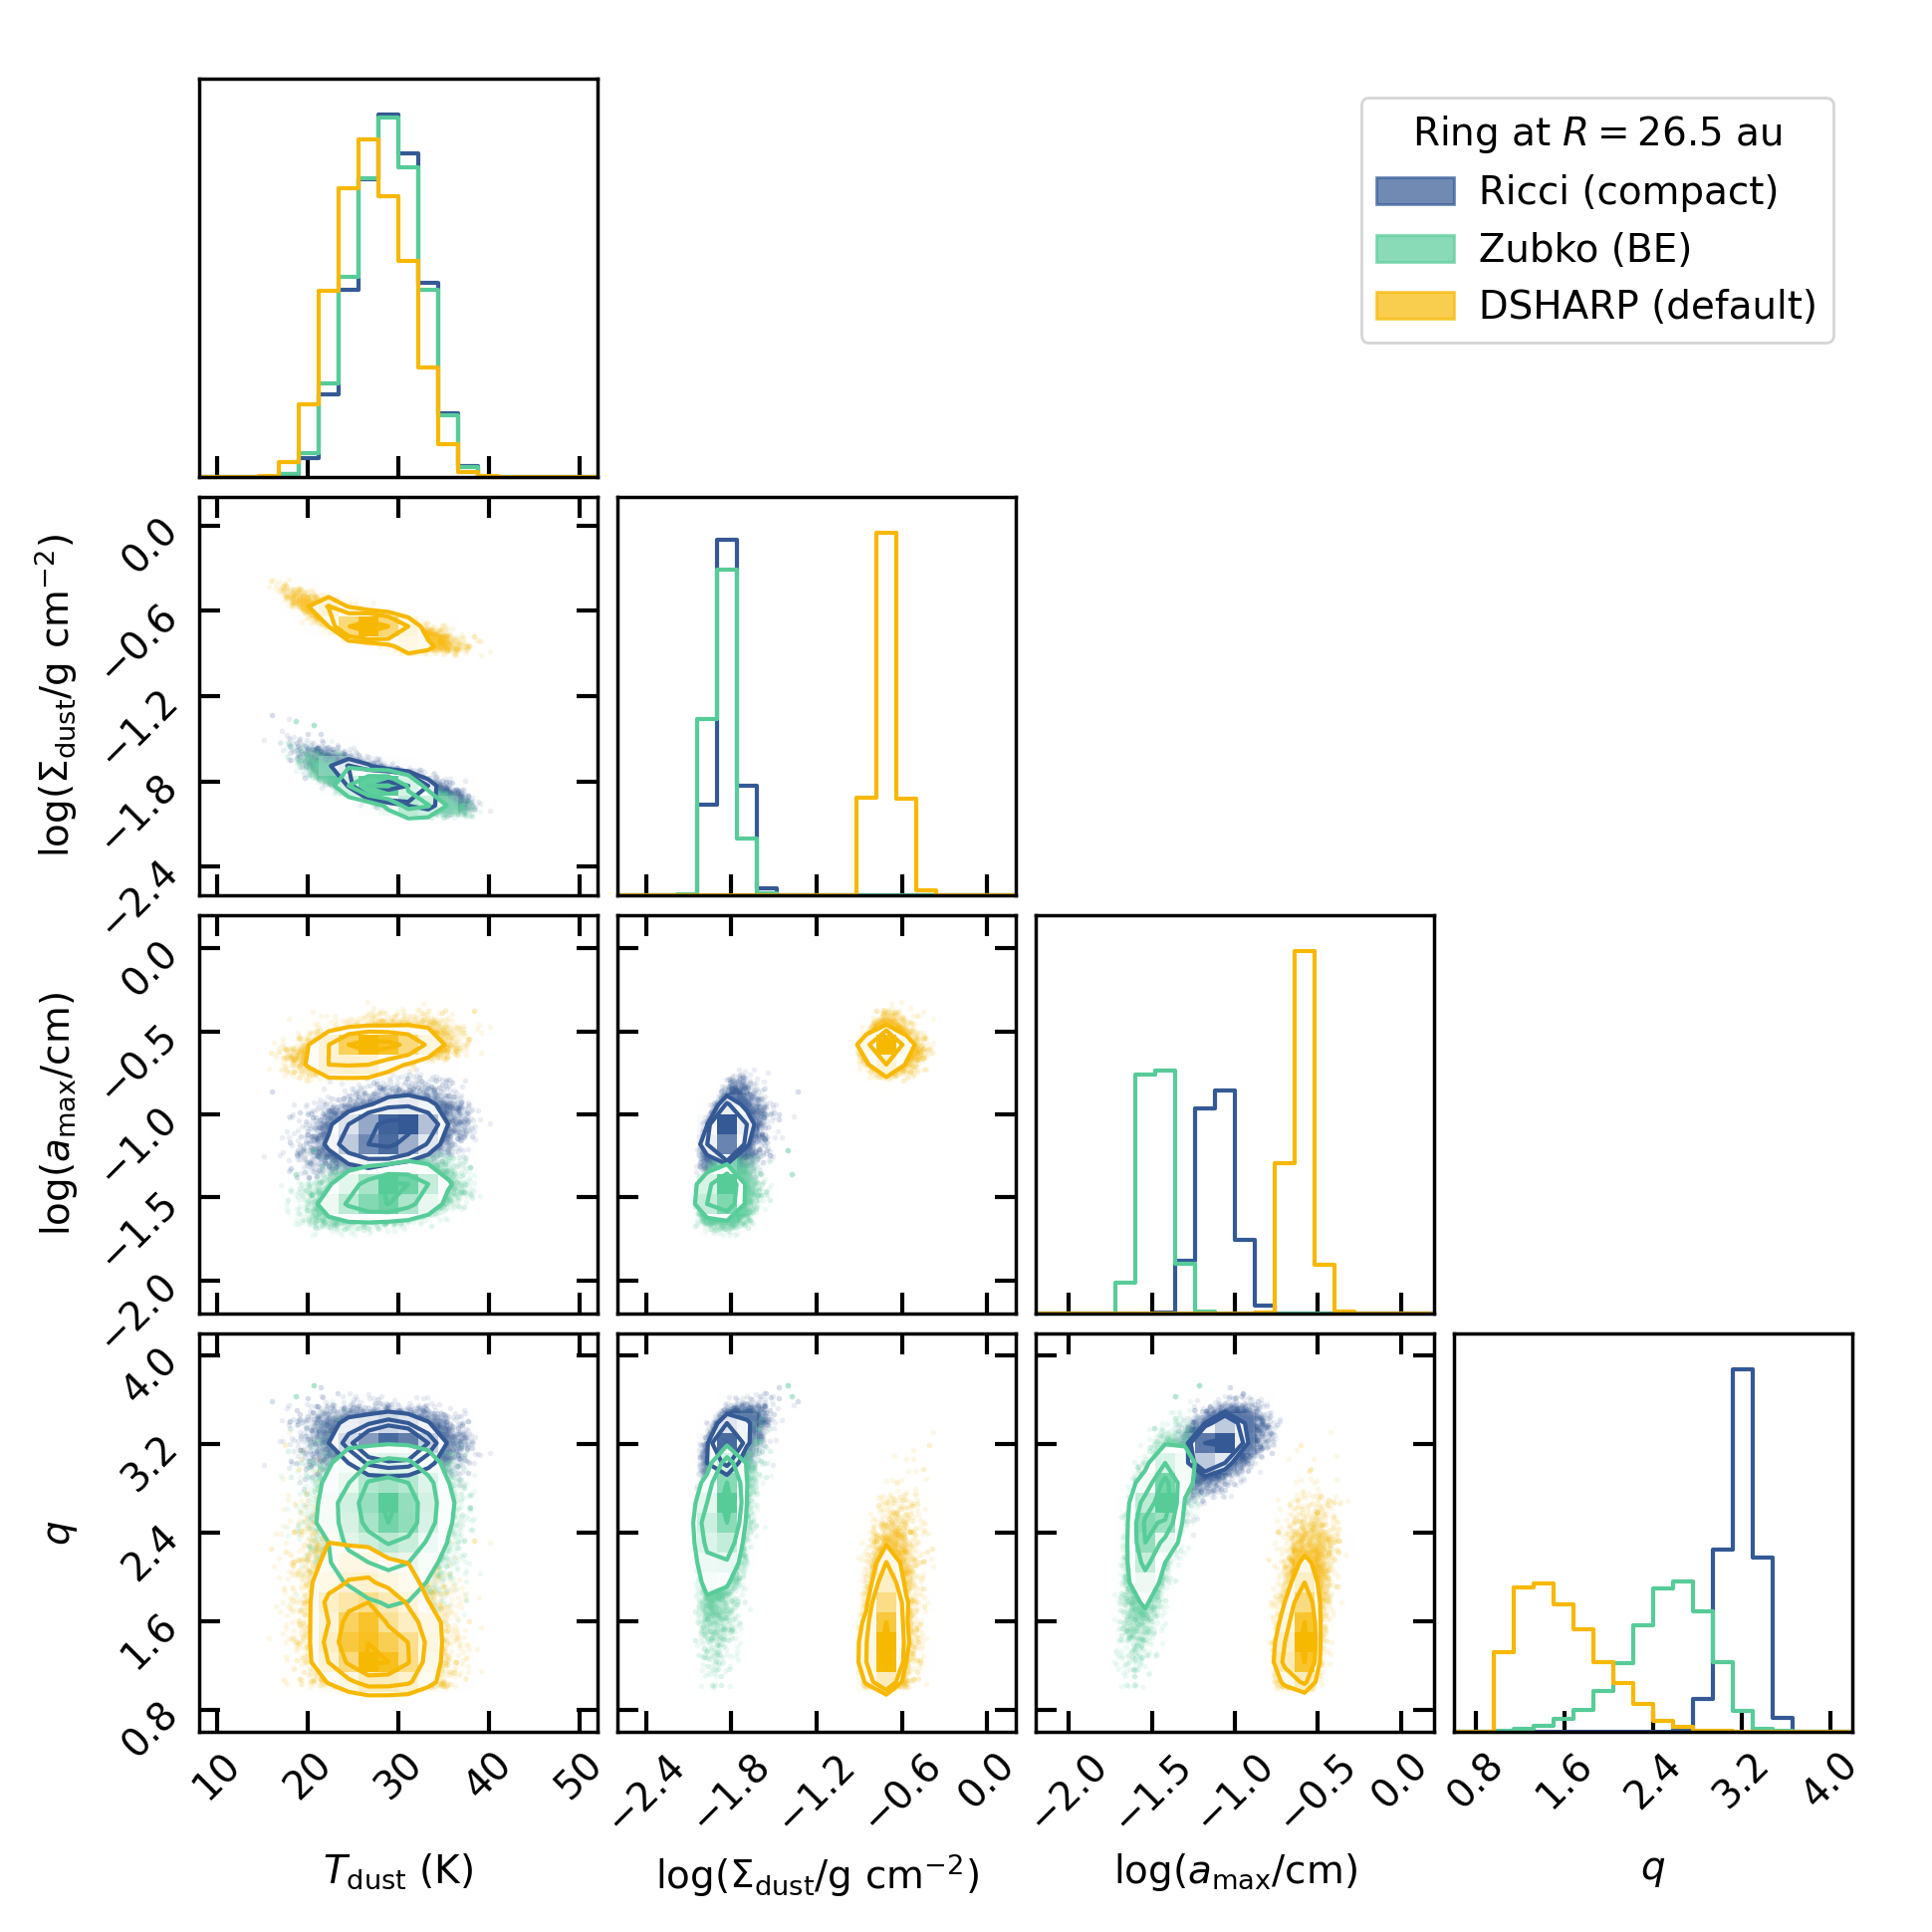

<IPython.core.display.Javascript object>


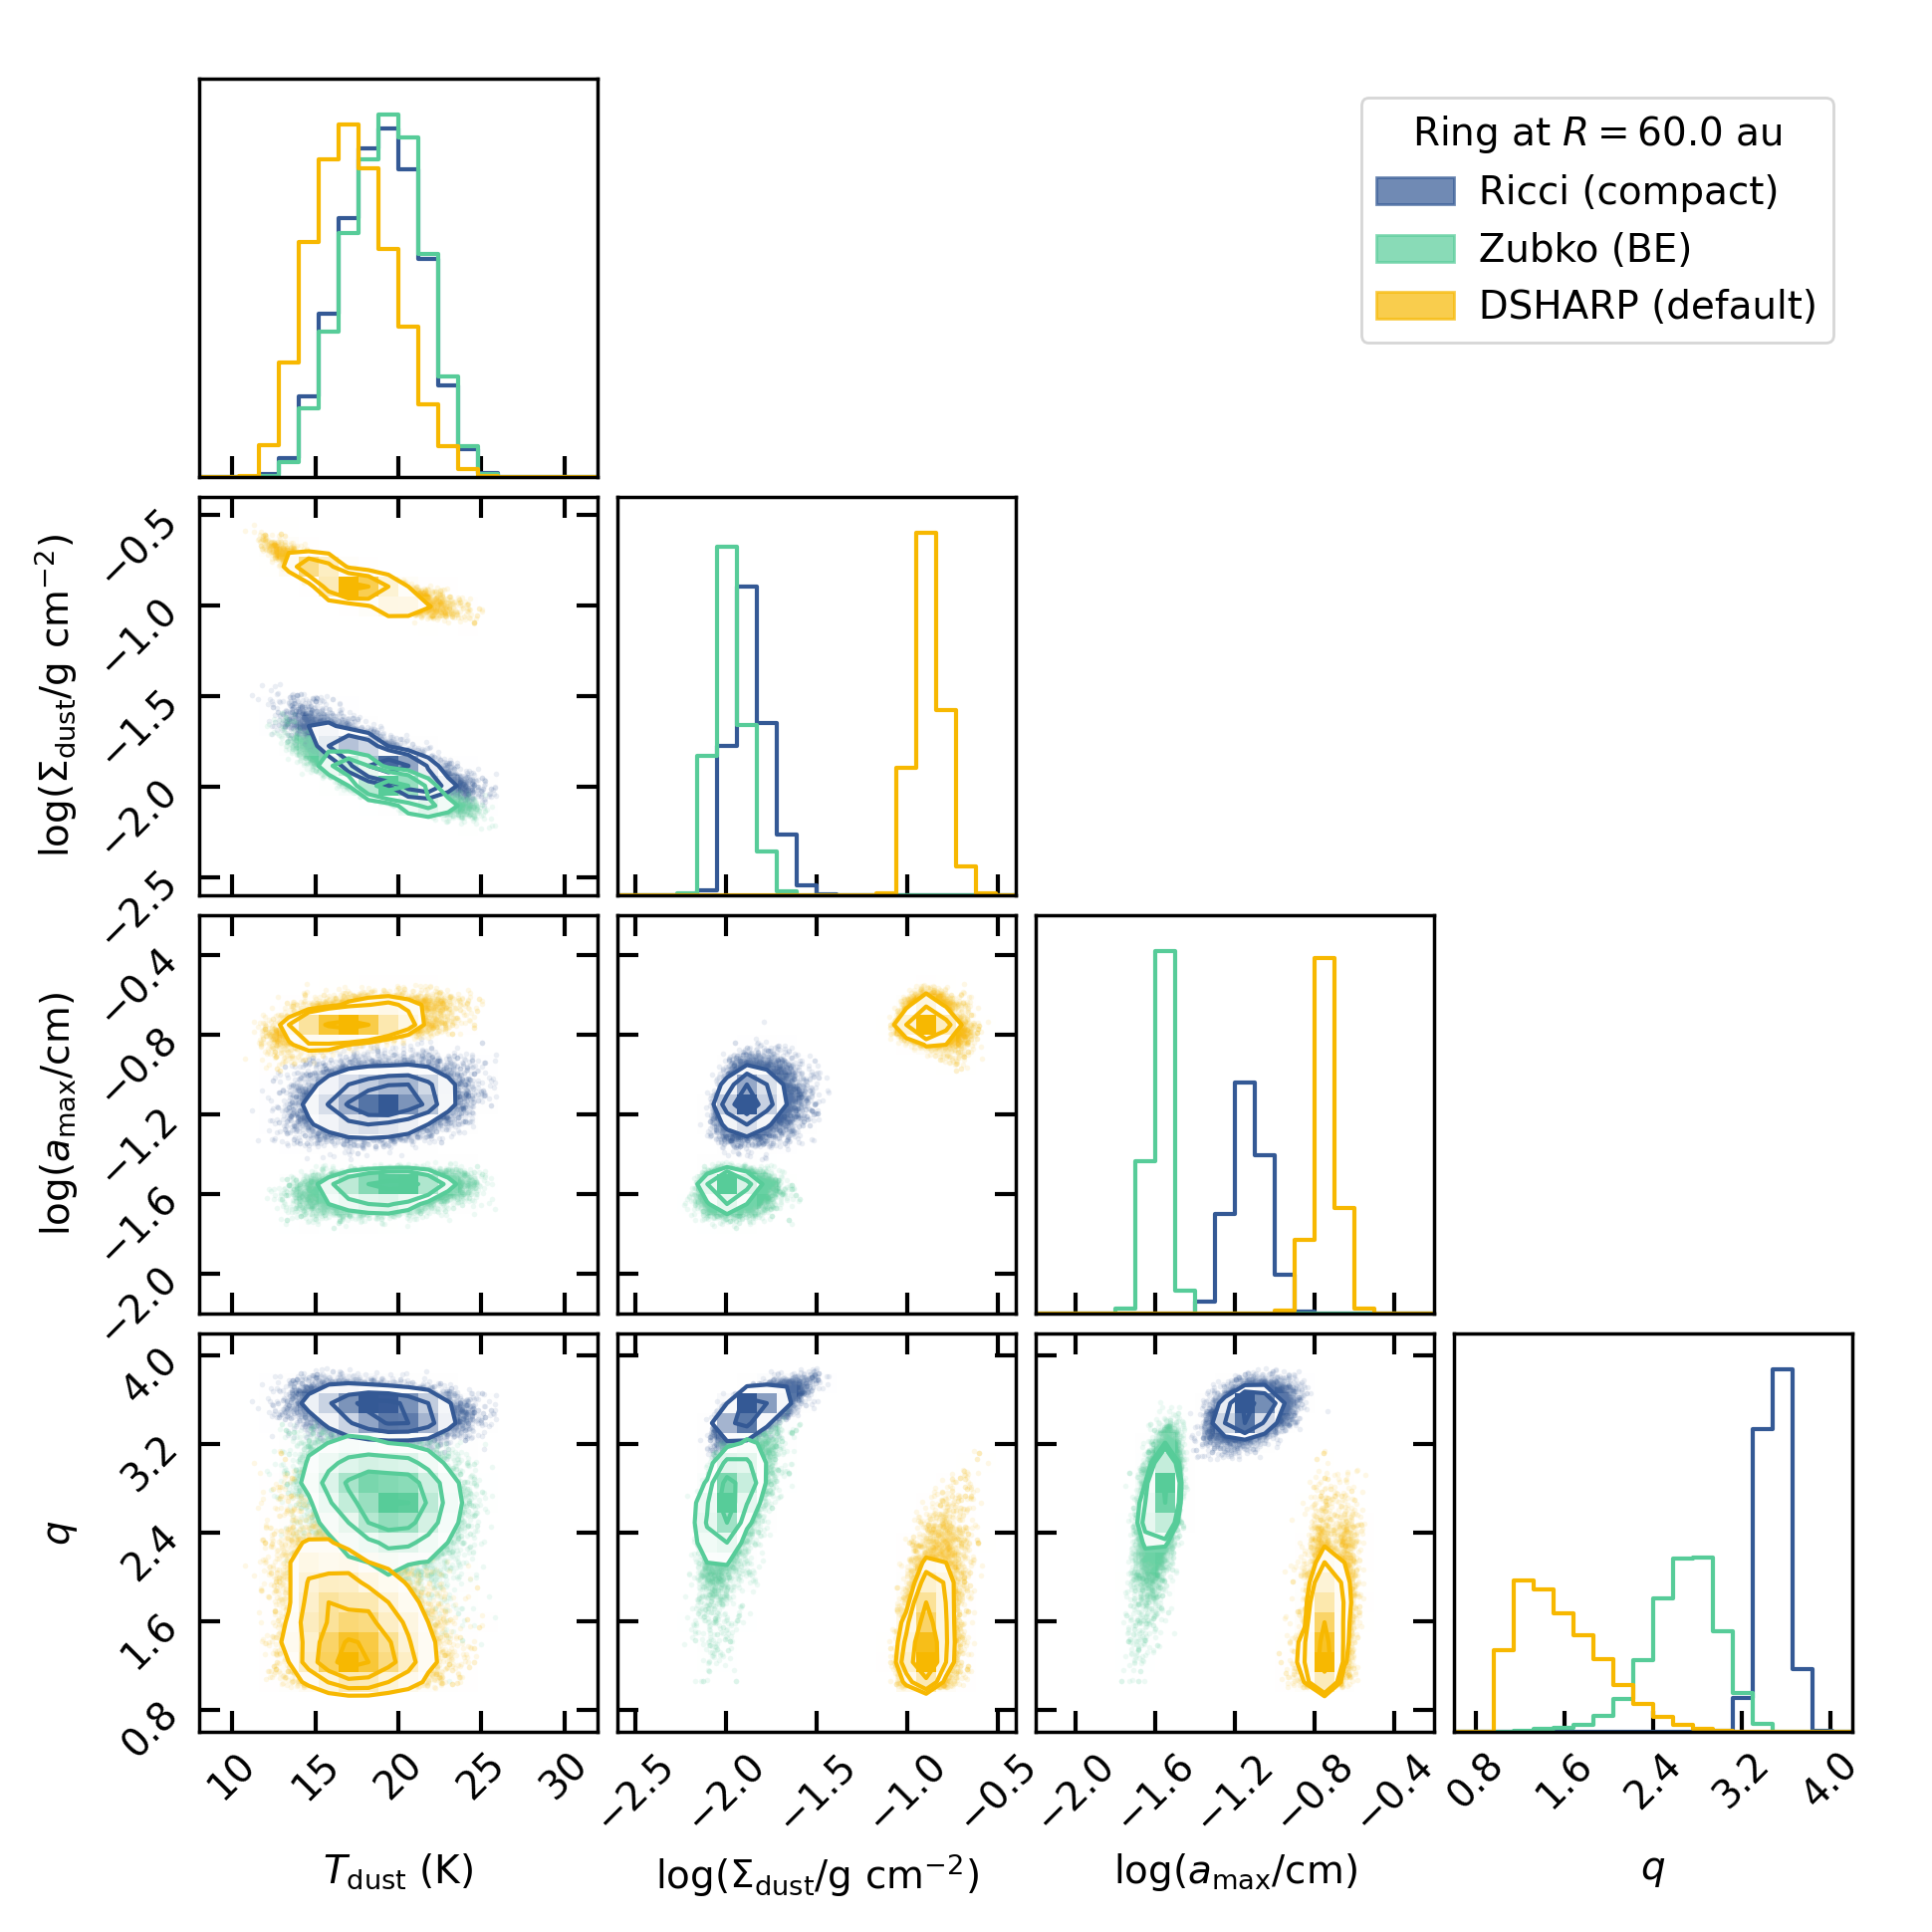

<IPython.core.display.Javascript object>


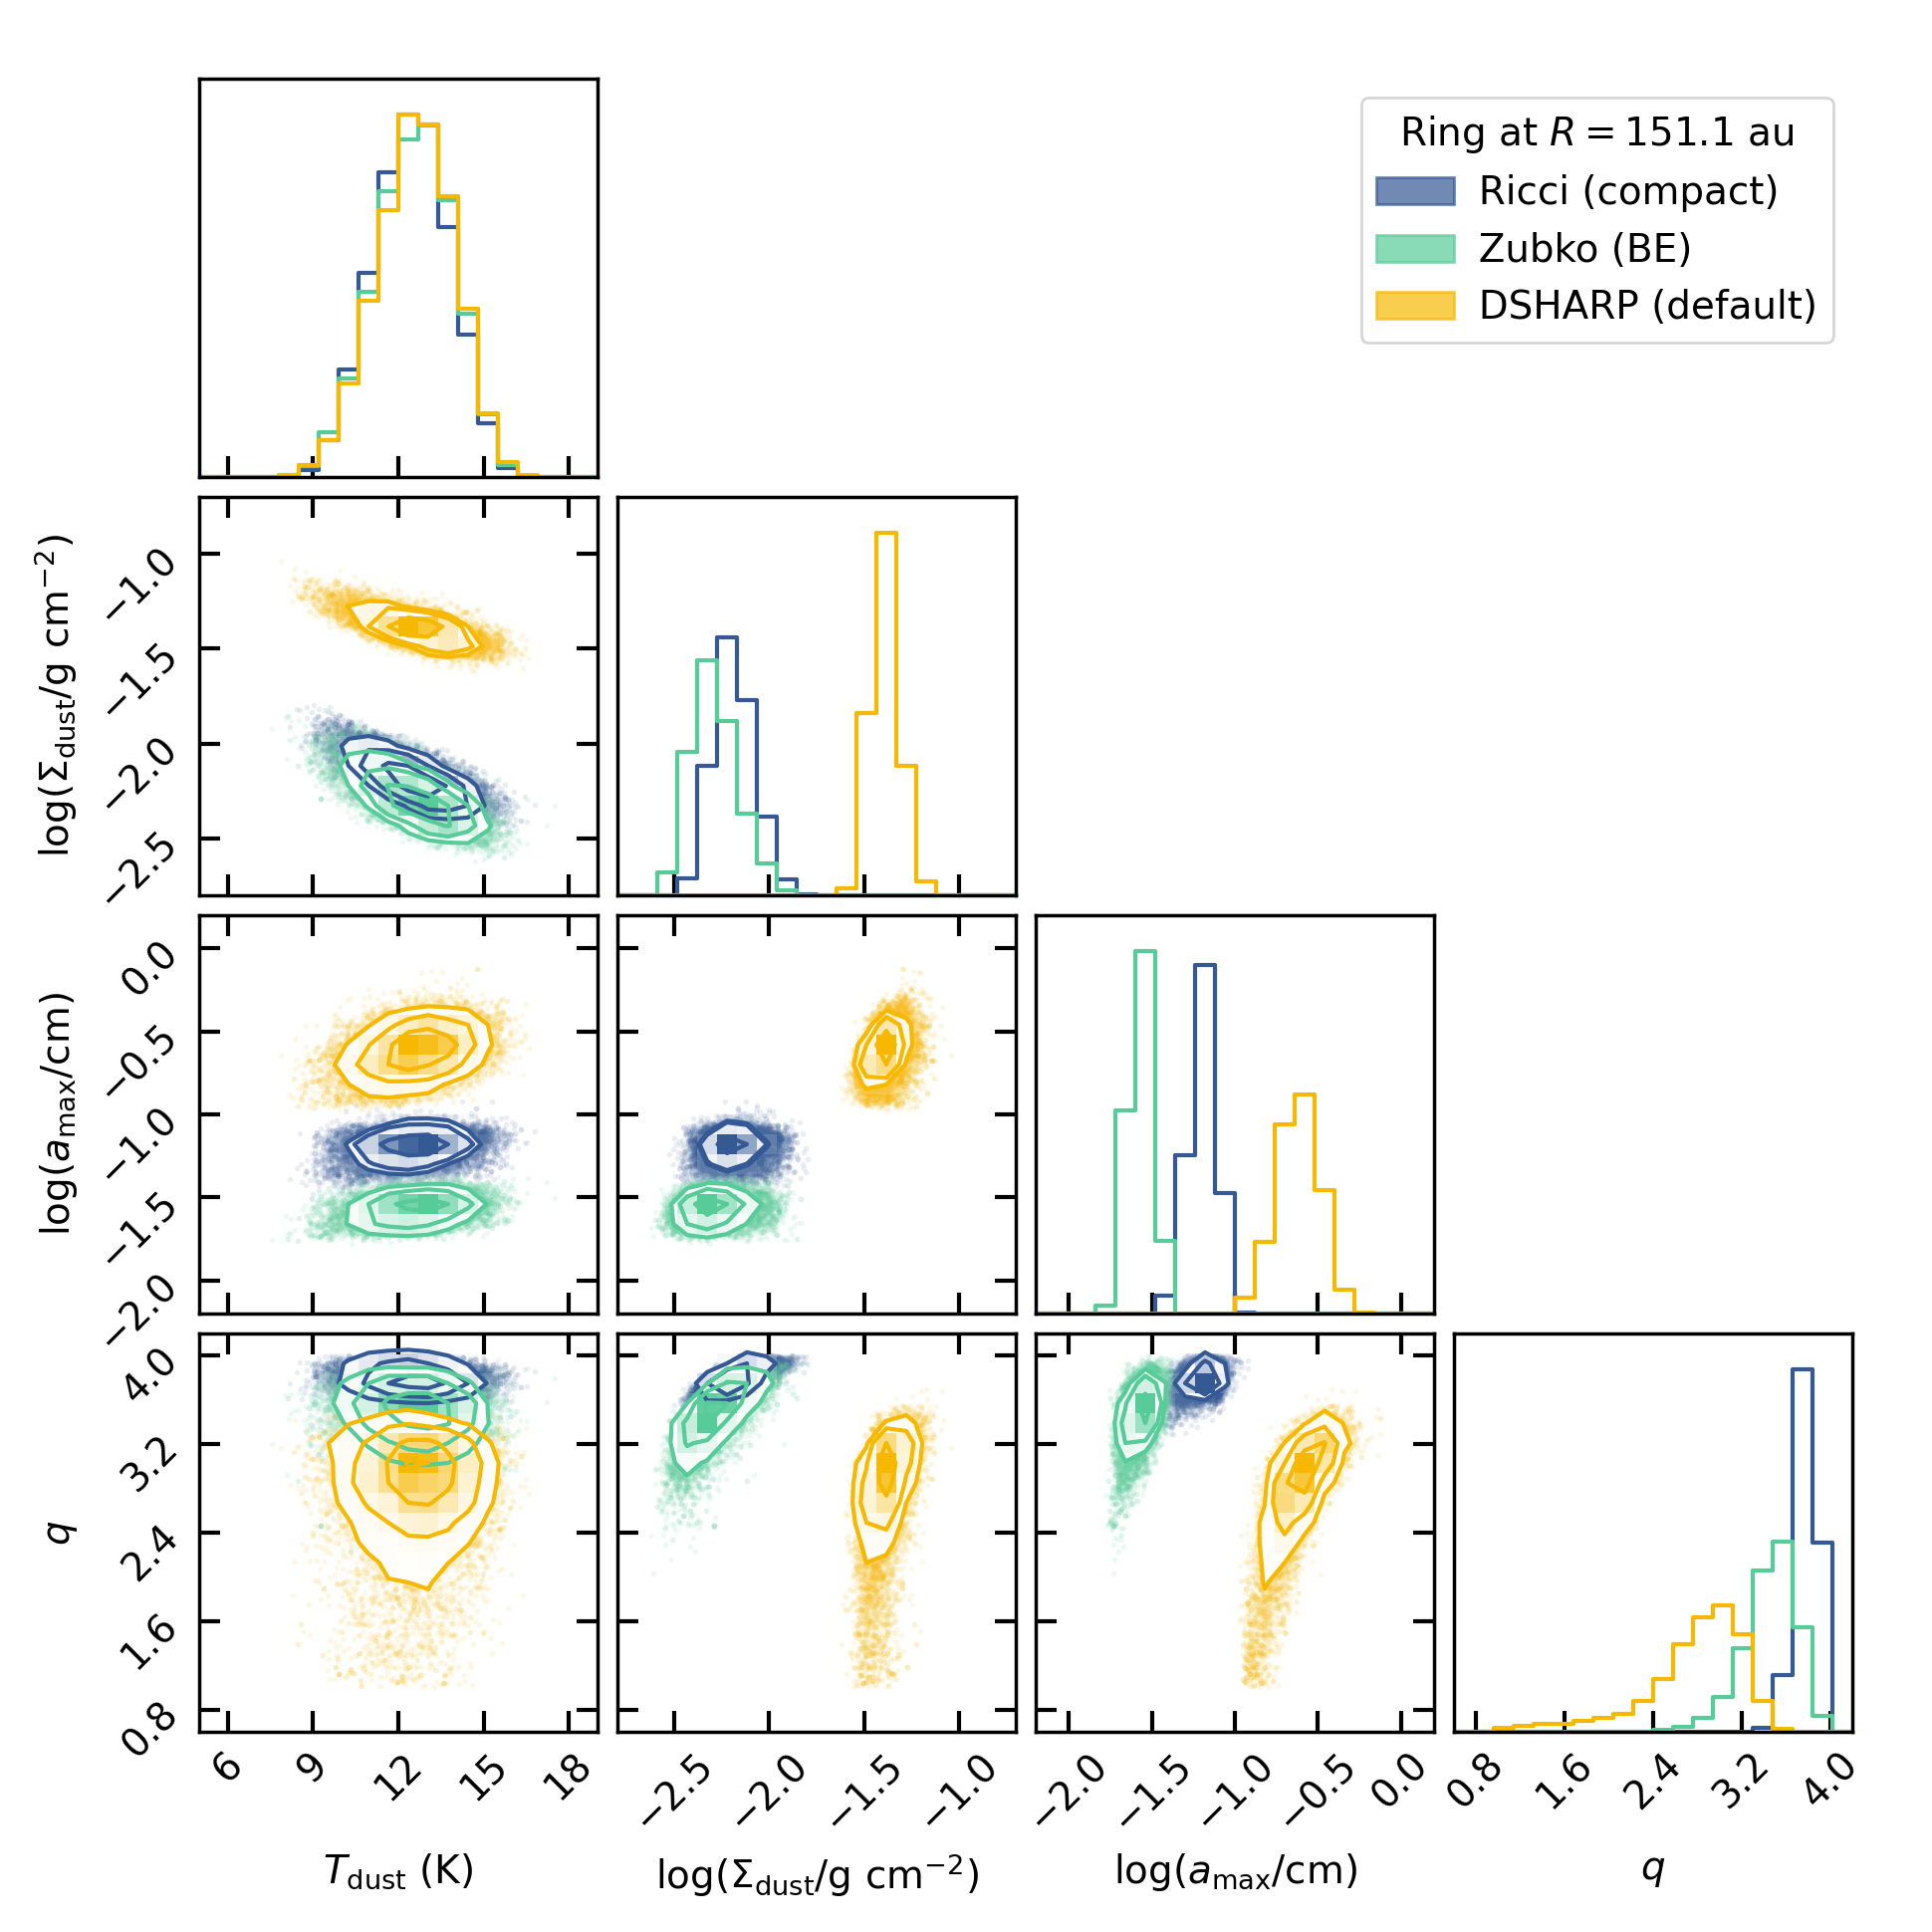

In [8]:
for idx, _rad in enumerate(rad):

    for jdx, _path in enumerate(path):
    
        flat_samples, flat_log_prior_samples, flat_temp = emcee_reader(_path,_rad)
    
        kwargs = {
            'data'             : flat_samples, 
            'range'            : plot_ranges[idx],
            'color'            : color[jdx],
            'smooth'           : False, 
            'smooth1d'         : False,
            'labels'           : [
                r"$T_{\rm dust}$ (K)", 
                r"$\log(\Sigma_{\rm dust}/{\rm g}\ {\rm cm}^{-2})$",
                r"$\log(a_{\rm max}/{\rm cm})$",
                r"$q$",
            ],
            'label_kwargs'     : {'fontsize':14},
            'show_titles'      : False, 
            'title_kwargs'     : {'fontsize':10}, 
            'truth_color'      : 'C1',
            #'quantiles'        : [0.50],
            #'quantile_color'   : color[jdx],
            'labelpad'         : 0.0,
            'verbose'          : False,
            'top_ticks'        : False,
            'hist_density'     : True,
        }
        
        if jdx == 0:
            fig = corner.corner(
                **kwargs
            )
        else:
            corner.corner(
                fig = fig,
                **kwargs
            )
        
        axs = fig.axes
        
        #pprior = []
        #temp   = np.linspace(1.,100.,1000)
        #for _t in temp:
        #    pprior.append(fpprob(z=_t,R=self.grid[bin_idx]))

        #axs[0].plot(temp, pprior, c='C2', lw=2)
        #flat_log_prior_samples = np.array([flat_log_prior_samples for _, flat_log_prior_samples in sorted(zip(flat_temp, flat_log_prior_samples))])
        #axs[0].plot(sorted(flat_temp), np.exp(flat_log_prior_samples), color='gray', ls='--', lw=2)

        #axs[0].set_ylim(0., np.amax(pprior) + 0.005)
        
    axs[3].legend(handles=legend_elements, fontsize=14, loc='upper right', handletextpad=0.0, title=f'Ring at $R={{{_rad:3.1f}}}$ au')

    for axs in fig.axes:
        axs.xaxis.set_tick_params(rotation=45)
        axs.yaxis.set_tick_params(rotation=45)

    fig.savefig('CITau_SEDfit_{}.pdf'.format(name[idx]), bbox_inches='tight')

    plt.show()